In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from sklearn.utils import resample

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
import distribution_modules as dm
import density_estimation_modules as dem
import classification_modules as cm
import importlib

importlib.reload(dm)
importlib.reload(dem)
importlib.reload(cm)

<module 'classification_modules' from '/home/ciwan/projects/msc_students/sheilafarrahi/thesis/classification_modules.py'>

In [3]:
# set configurations for number of samples
sample_size = 500
nr_sample = 20

In [4]:
bounded_dists = dm.get_bounded_distribution()
bounded_dists

{'arcsine': <scipy.stats._distn_infrastructure.rv_frozen at 0x7fc0c44cd190>,
 'beta_1_2': <scipy.stats._distn_infrastructure.rv_frozen at 0x7fc0852e2850>,
 'powerlaw_0.3': <scipy.stats._distn_infrastructure.rv_frozen at 0x7fc0852d4940>,
 'trapezoid_0.3_0.8': <scipy.stats._distn_infrastructure.rv_frozen at 0x7fc0852e2b80>,
 'traing_0.3': <scipy.stats._distn_infrastructure.rv_frozen at 0x7fc0852f41f0>,
 'uniform': <scipy.stats._distn_infrastructure.rv_frozen at 0x7fc0852e2ca0>}

In [5]:
x = np.linspace(0,1,20)
samples_dict = dm.get_samples(bounded_dists, nr_sample, sample_size)
edf_df = dem.get_edf(samples_dict, x)
edf_df.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,dist
0,0.0,0.162,0.224,0.262,0.316,0.352,0.384,0.414,0.448,0.476,...,0.548,0.596,0.642,0.676,0.702,0.734,0.794,0.876,1.0,arcsine
1,0.0,0.152,0.218,0.284,0.332,0.378,0.412,0.450,0.482,0.510,...,0.558,0.580,0.612,0.652,0.684,0.738,0.782,0.856,1.0,arcsine
2,0.0,0.136,0.202,0.268,0.316,0.350,0.388,0.424,0.452,0.486,...,0.540,0.572,0.606,0.650,0.686,0.728,0.770,0.842,1.0,arcsine
3,0.0,0.162,0.230,0.274,0.314,0.352,0.384,0.402,0.440,0.460,...,0.534,0.564,0.596,0.646,0.682,0.716,0.778,0.844,1.0,arcsine
4,0.0,0.164,0.230,0.296,0.350,0.390,0.422,0.448,0.488,0.520,...,0.590,0.626,0.664,0.698,0.734,0.780,0.842,0.876,1.0,arcsine


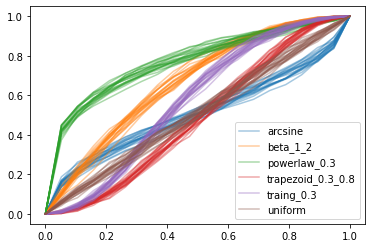

In [6]:
dem.get_edf_plot_ciwan(edf_df, x)

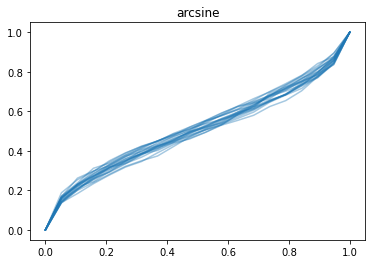

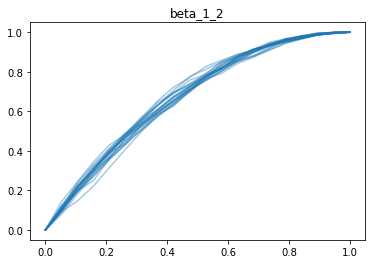

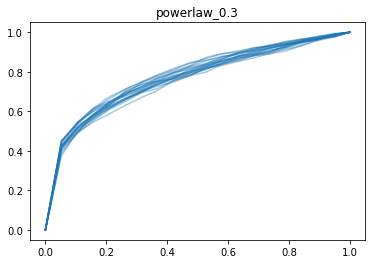

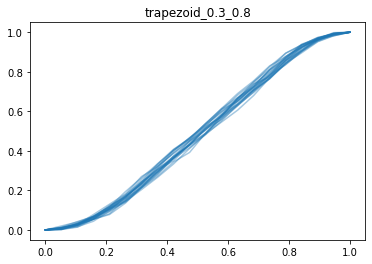

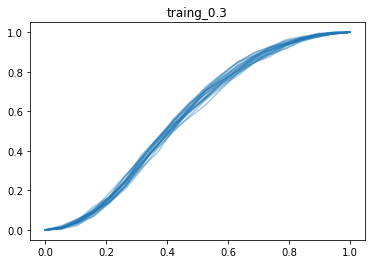

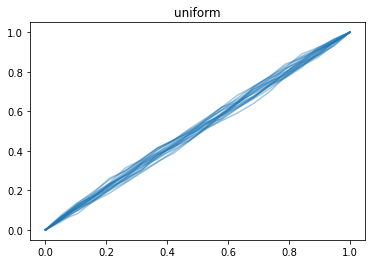

In [7]:
dem.get_edf_plot(edf_df, x)

In [8]:
test_size = 0.2
cv = 5
cm.svm_model(edf_df, test_size, cv)

array([1., 1., 1., 1., 1.])

In [9]:
longtail_dists = dm.get_longtail_distribution()
longtail_dists

{'cauchy': <scipy.stats._distn_infrastructure.rv_frozen at 0x7fc08420e880>,
 'lognorm_1.5': <scipy.stats._distn_infrastructure.rv_frozen at 0x7fc085125340>,
 'pareto_1.5': <scipy.stats._distn_infrastructure.rv_frozen at 0x7fc0844ab040>,
 'weibull_min_0.4': <scipy.stats._distn_infrastructure.rv_frozen at 0x7fc085125bb0>}

In [10]:
x = np.linspace(0,20,100)
samples_dict = dm.get_samples(longtail_dists, nr_sample, sample_size)
edf_df = dem.get_edf(samples_dict, x)
edf_df.head()

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,dist
0,0.0,0.140,0.248,0.356,0.426,0.484,0.564,0.624,0.666,0.688,...,0.972,0.974,0.976,0.976,0.976,0.978,0.978,0.978,0.978,cauchy
1,0.0,0.136,0.264,0.384,0.466,0.528,0.566,0.604,0.636,0.664,...,0.958,0.958,0.958,0.960,0.960,0.964,0.964,0.964,0.964,cauchy
2,0.0,0.110,0.244,0.354,0.432,0.512,0.546,0.600,0.636,0.668,...,0.960,0.960,0.960,0.960,0.960,0.960,0.960,0.960,0.964,cauchy
3,0.0,0.128,0.262,0.354,0.418,0.482,0.542,0.584,0.636,0.658,...,0.966,0.966,0.966,0.966,0.966,0.968,0.970,0.970,0.970,cauchy
4,0.0,0.148,0.284,0.394,0.464,0.538,0.602,0.654,0.696,0.718,...,0.962,0.962,0.962,0.962,0.962,0.962,0.962,0.962,0.962,cauchy


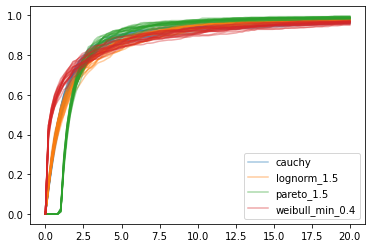

In [11]:
dem.get_edf_plot_ciwan(edf_df, x)

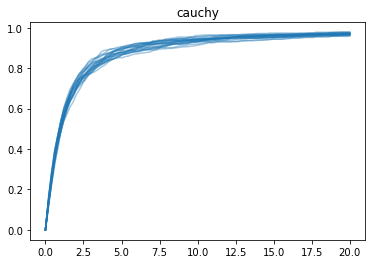

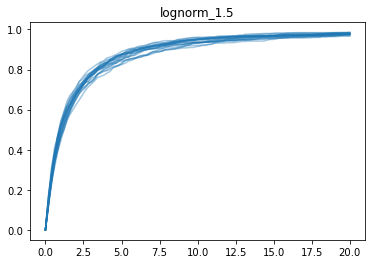

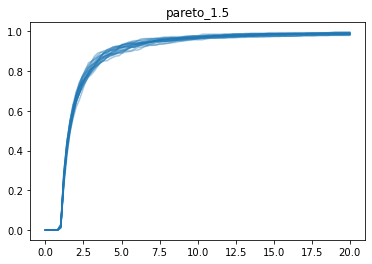

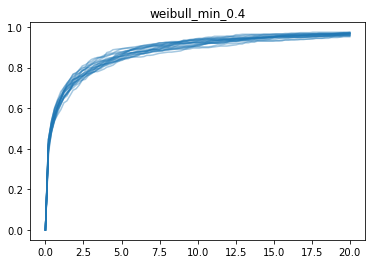

In [12]:
dem.get_edf_plot(edf_df, x)

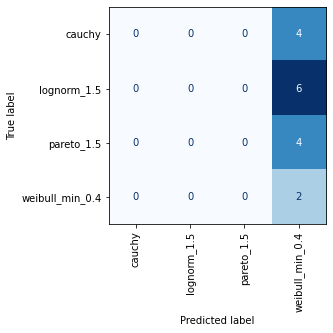

array([0.23076923, 0.23076923, 0.38461538, 0.30769231, 0.41666667])

In [13]:
test_size = 0.2
cv = 5
cm.svm_model(edf_df, test_size, cv, plot=1)